In [416]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline

# Ensemble plotter

In [417]:
Nx, Ny, Nz = 64, 1, 64
et = 1.0

def load(Nx,Ny,Nz,et):
    base_fn = 'output_swe_vortex'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,Nz,et)

wdawloc_pp_rhou_rhow_tra_cont_blend_fs=2_ts=0
(1, 10, 64, 1, 64)
(64, 64)


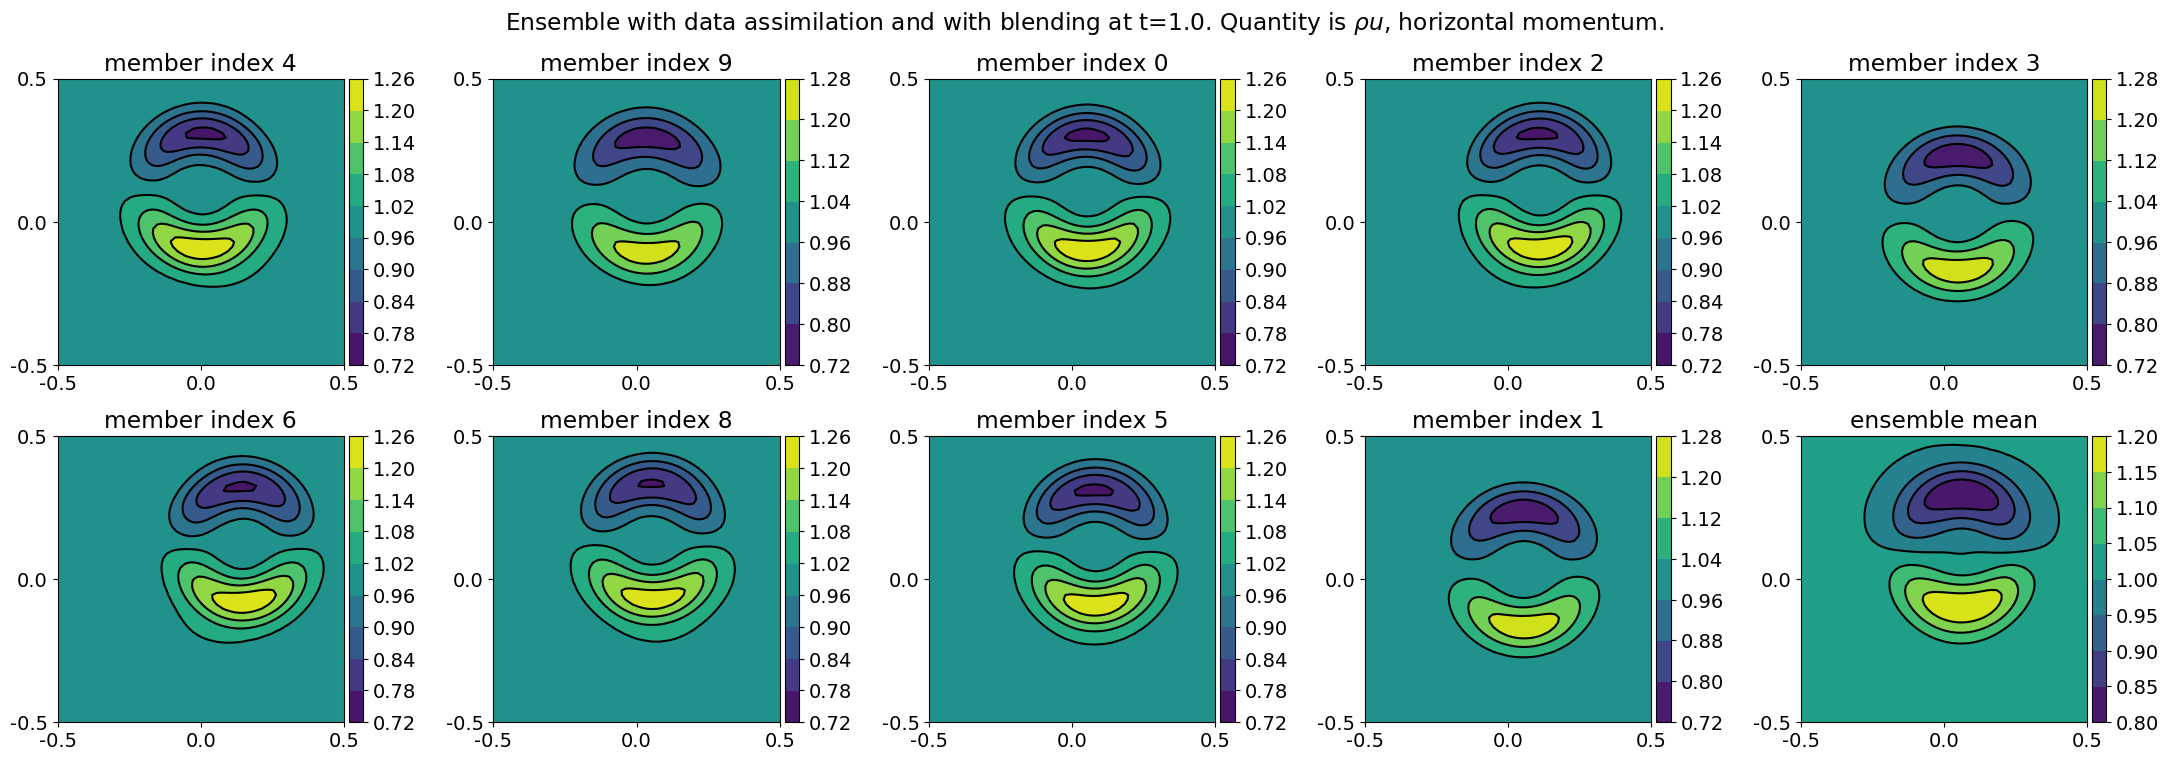

In [486]:
import random

random.seed(444)

N = 10
sfx = 'noda_p0.1'
# sfx = 'debug'
# sfx = 'wdawloc_1.0_rhou_rhow_p0.5_debug'
sfx = 'wdawloc_1.0_rhou_rhow_p0.2_tra_corr_2pi'
sfx = 'wdawloc_pp_rhou_rhow_tra'
sfx = tc.cb_suffix(2,0, '%s' %(sfx))
# sfx = 'noda_pp'
# sfx = 'noda_pp_psinc'
print(sfx)
attribute = 'rhou'

times = [0.0]
tag = 'ic'

times = [0.07]
tag = tags[9]

ens = tc.get_ensemble(times, N, attribute, sfx, tag=tag, inner=True)
print(ens.shape)
mean = np.mean(ens[0],axis=0)[:,0,:]
print(np.array(mean).shape)
mean = [mean.T,'ensemble mean']

attr_labels = pt.labels()

for ens_at in ens:
    ncolslen = int((ens_at.shape)[0]/2)
#     print(ncolslen)
#     fs = (18,6)
    fs = (14,8) # 2x2
    fs = (22,8)

    arr_lst = []
    for n, arr in enumerate(ens_at):
        arr = arr[:,0,:].T
#         print(n, arr.mean())
#         arr -= arr.min()

        arr_lst.append([arr, 'member index %i' %n])
#     arr_lst = [[arr[:,0,:].T,'member index %i' %n] for n,arr in enumerate(ens_at)]
    arr_lst = random.sample(arr_lst, k=9)
    arr_lst.append(mean)
    nn = 1 if N == 2 else 2
    ncolslen = int(len(arr_lst)/nn)
#     print(ncolslen)

    pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

    x_axs = [-0.5,0.0,0.5]
    y_axs = [-0.5,0.0,0.5]
    x_loc = np.linspace(0,Nx-1,3)
    y_loc = np.linspace(0,Nz-1,3)
    pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs)

    st = "Ensemble with data assimilation and with blending at t=1.0. Quantity is %s." %attr_labels[attribute]
    _ = pl.plot(aspect='equal',method='contour',suptitle=st)
#     pl.save_fig('swetv_ens_ic')

(100, 10, 64, 1, 64)
(100, 10, 64, 1, 64)
(100, 10, 64, 1, 64)
(100, 10, 64, 1, 64)
(99, 10, 65, 2, 65)


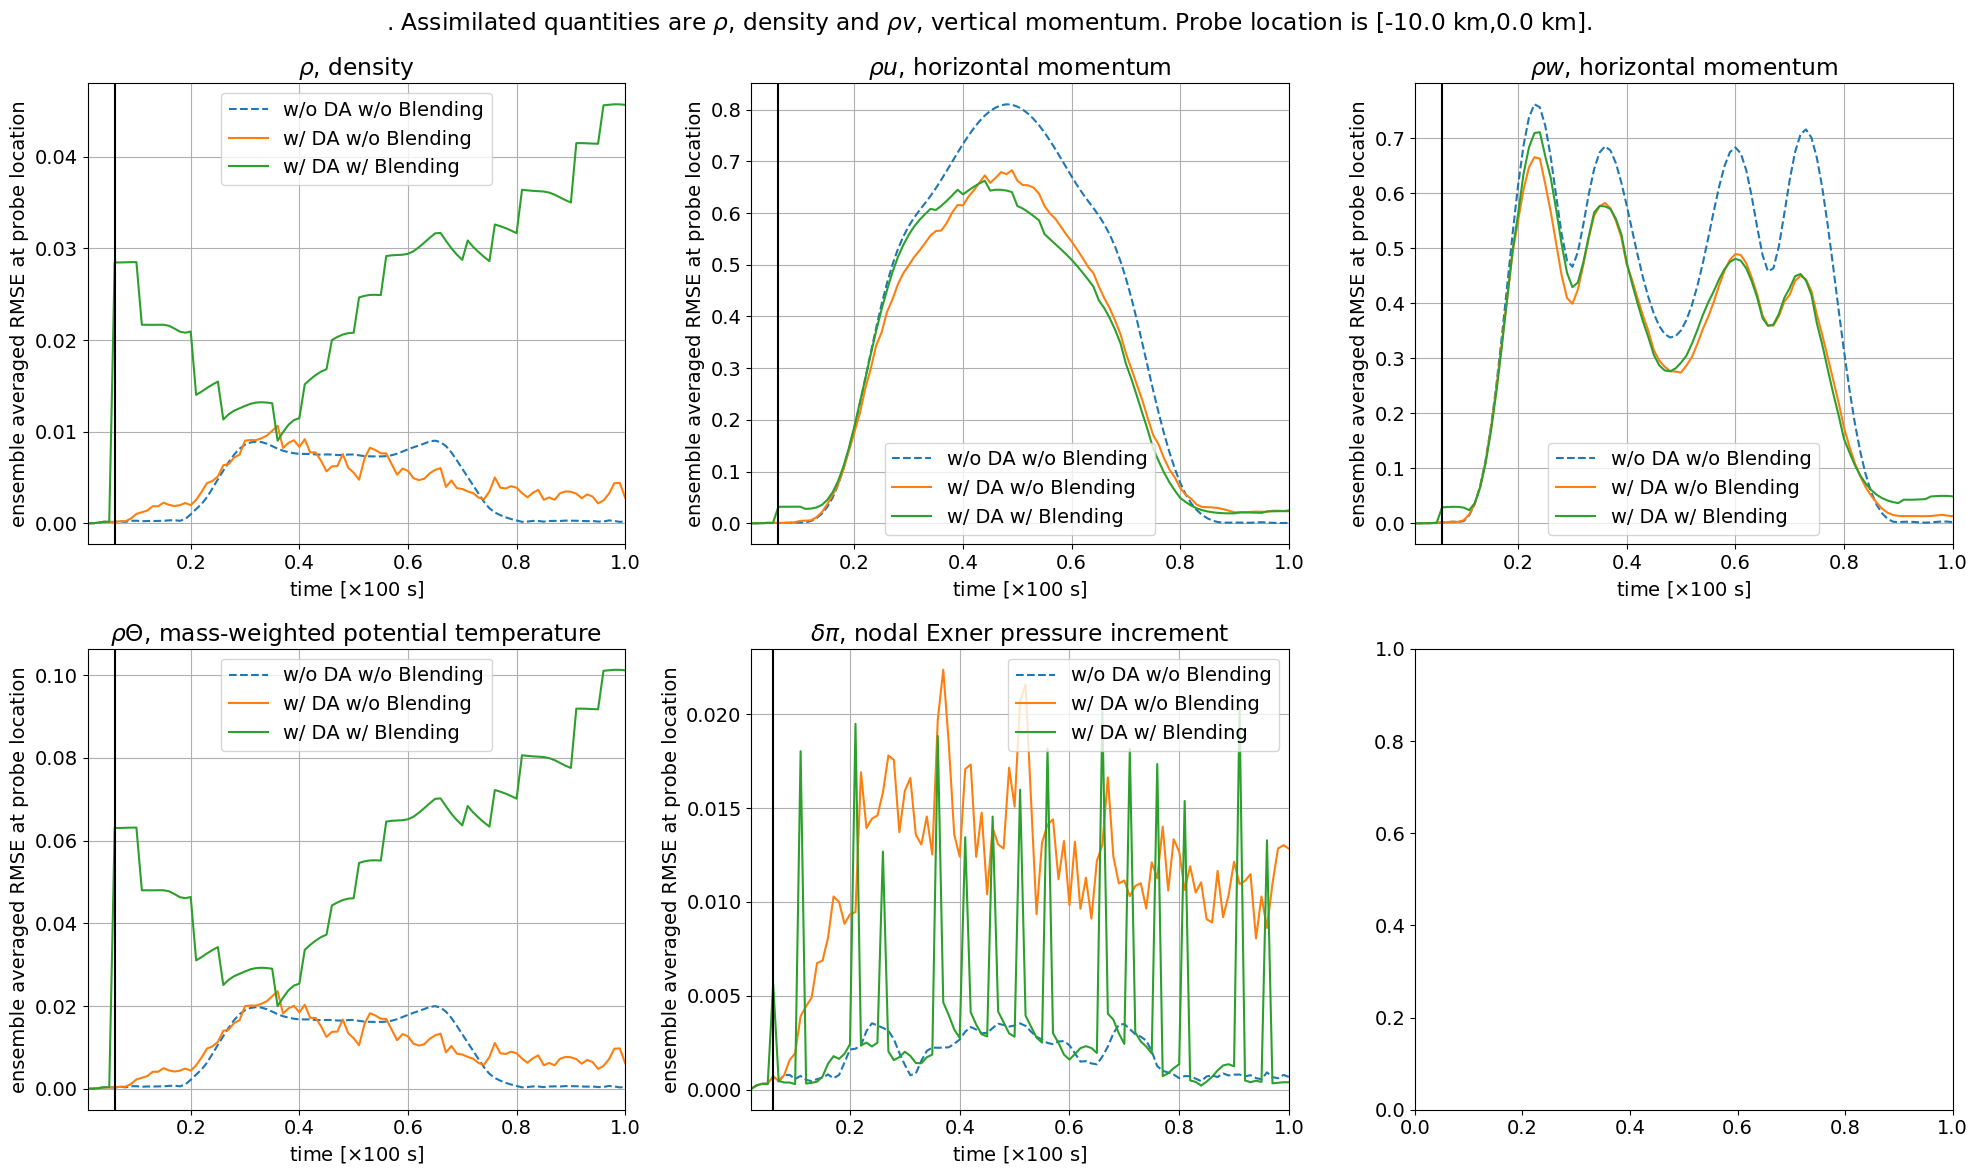

In [475]:
attributes = ['rho','rhou','rhow','rhoY','p2_nodes']

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 64
Ny = 1
Nz = 64
et = 1.0
times = np.arange(0.0,1.01,0.01)[1:]

probe_idx = [0,0]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_obs_covar_ensemble_spread'
title = ''

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

rmse_type = 'probe'
# rmse_type = 'spatial'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=False, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'noda_pp'
    ens_noda_label = 'w/o DA w/o Blending'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'wdawloc_pp_rhou_rhow_tra'
    ens_1_label = r'w/ DA w/o Blending'
    
    ens_2_suffix = tc.cb_suffix(2,0, '%s' %(ens_1_suffix))
    ens_2_label = r'w/ DA w/ Blending'

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    print(ens_1.shape)
    
    truth = tc.get_ensemble(times, 1, attribute, 'comp_1.0_pp_tra_truth', label_type='TIME',avg=False, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, truth, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, truth, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, truth, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,truth,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,truth,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,truth,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("Assimilated quantities are %s and %s." %(attr_labels['rhou'], attr_labels['rhow']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_noda, '--', label=ens_noda_label)
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.axvline(0.06, c='k')

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))
True
plt.tight_layout(rect=[0, 0.0, 1, 0.96])
# plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()